<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/2025notebooks/2025_0428opencv_face_detect_recognizer_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import IPython
isColab = 'google.colab' in str(IPython.get_ipython())

if isColab:
    !pip install opencv-python --upgrade

import numpy as np
import cv2 as cv
import sys
import urllib
import os
import matplotlib.pyplot as plt
import urllib

try:
    import japanize_matplotlib
except ImportError:
    !pip install japanize_matplotlib
    import japanize_matplotlib

face_detector_fname = 'face_detection_yunet_2023mar.onnx'
face_detector_url = 'https://github.com/opencv/opencv_zoo/raw/refs/heads/main/models/face_detection_yunet/face_detection_yunet_2023mar.onnx'


if os.path.exists(face_detector_fname):
    print(f'{face_detector_fname} already exists.')
else:
    try:
        urllib.request.urlretrieve(face_detector_url, face_detector_fname)
        print(f"Successfully downloaded {face_detector_fname}")
    except Exception as e:
        print(f"An error occurred: {e}")

face_detector = cv.FaceDetectorYN.create(
    model = face_detector_fname,
    config = "",
    input_size = (320,320),
    score_threshold = 0.9,
    nms_threshold = 0.3,
    top_k = 5000)


face_recognizer_fname = 'face_recognition_sface_2021dec.onnx'
face_recognizer_url = 'https://github.com/opencv/opencv_zoo/raw/refs/heads/main/models/face_recognition_sface/face_recognition_sface_2021dec.onnx'

if os.path.exists(face_recognizer_fname):
    print(f'{face_recognizer_fname} already exists.')
else:
    try:
        urllib.request.urlretrieve(face_recognizer_url, face_recognizer_fname)
        print(f"Successfully downloaded {face_recognizer_fname}")
    except Exception as e:
        print(f"An error occurred: {e}")

face_recognizer = cv.FaceRecognizerSF.create(
    model = face_recognizer_fname, config="",
)

def visualize(img, faces, fps, thickness=24):
    if faces[1] is not None:
        for idx, face in enumerate(faces[1]):
            print(f'Face {idx}',
                  f'top-left coordinates: ({face[0]:.0f}',
                  f'{face[1]:.0f})',
                  f'box width: {face[2]:.0f}',
                  f'box height {face[3]:.0f}',
                  f'score: {face[-1]:.2f}')

            coords = face[:-1].astype(np.int32)
            cv.rectangle(img, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
            cv.circle(img, (coords[4], coords[5]), 2, (255, 0, 0), thickness)  # 右目を 青 で描画
            cv.circle(img, (coords[6], coords[7]), 2, (0, 0, 255), thickness)  # 左目を 赤 で描画
            cv.circle(img, (coords[8], coords[9]), 2, (0, 255, 0), thickness) # 鼻を 緑 で描画
            cv.circle(img, (coords[10], coords[11]), 2, (255, 0, 255), thickness) # 右唇 を ピンクで描画
            cv.circle(img, (coords[12], coords[13]), 2, (0, 255, 255), thickness) # 左唇を 黄色で描画
    cv.putText(img, f'FPS: {fps:.2f}', (1, 16), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    #cv.putText(input, 'FPS: {:.2f}'.format(fps), (1, 16), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

In [ ]:
# Web 上にある任意の画像を持ってきて試してみる
# たとえば https://prtimes.jp/main/html/rd/p/000000006.000024843.html から一枚の画像を持ってくる。
# 手順は以下のとおり:
# 1. 任意の URL を閲覧し，そのページ内に表示されている画像をマウス右クリック，あるいは右クリックに相当する操作を行う。
# 2. 現れたウィンドウ内にあるメニューから画像の URL を選んで情報をコピーする。
# 3. コピーした画像の URL を以下の欄に貼り付ける
!wget https://prtimes.jp/i/24843/6/resize/d24843-6-786069-2.jpg -O test_faces.jpg

img = cv.imread('test_faces.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 顔検出の実例
imgHeight = int(img.shape[0])
imgWidth = int(img.shape[1])

face_detector.setInputSize((imgWidth, imgHeight))
faces = face_detector.detect(img)

tm = cv.TickMeter()
tm.reset(); tm.start()
visualize(img, faces, tm.getFPS(), thickness=2)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 顔を含む画像をアップロードする
if isColab:
    from google.colab import files
    files.upload()

# ここでは 2 枚の画像を自身の PC からアップロードすることを想定している
# アップロードした画像のファイル名に合わせて適宜下の 2 行のファイル名を変更する必要がある
img1_fname = 'IMG_0328.jpg'
img2_fname = 'IMG_0330.jpg'

In [ ]:
# アップロードした画像を表示
img1 = cv.imread(img1_fname)
img2 = cv.imread(img2_fname)

img1Width = int(img1.shape[1])
img1Height = int(img1.shape[0])

face_detector.setInputSize((img1Width, img1Height))
#print(type(img1), img1.min(), img1.max())

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
axes[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
axes[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.show()

Face 0 top-left coordinates: (3303 1242) box width: 304 box height 311 score: 0.93
Face 1 top-left coordinates: (1111 466) box width: 167 box height 243 score: 0.93
Face 2 top-left coordinates: (2383 936) box width: 179 box height 238 score: 0.92
Face 3 top-left coordinates: (1485 443) box width: 150 box height 180 score: 0.91
Face 4 top-left coordinates: (2315 584) box width: 141 box height 187 score: 0.91
Face 5 top-left coordinates: (2026 472) box width: 124 box height 177 score: 0.91
Face 6 top-left coordinates: (608 278) box width: 299 box height 337 score: 0.90
Face 0 top-left coordinates: (2924 1611) box width: 212 box height 278 score: 0.96
Face 1 top-left coordinates: (545 1467) box width: 224 box height 251 score: 0.94
Face 2 top-left coordinates: (2486 1440) box width: 164 box height 213 score: 0.94
Face 3 top-left coordinates: (1024 1319) box width: 156 box height 193 score: 0.94
Face 4 top-left coordinates: (1408 1201) box width: 134 box height 179 score: 0.93
Face 5 top-l

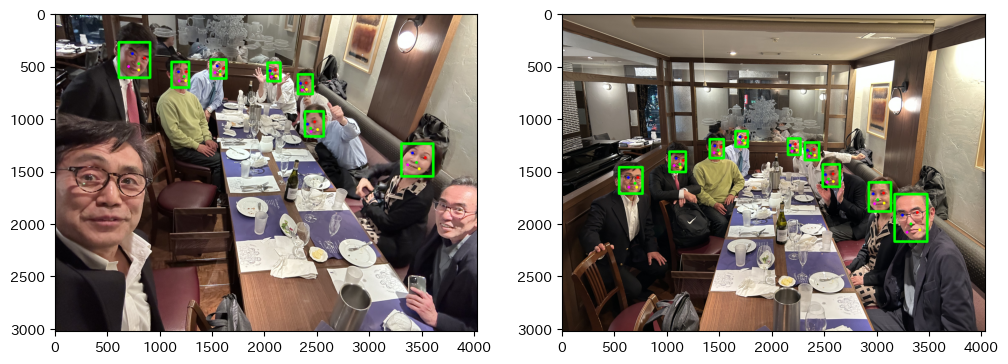

In [12]:
# 顔検出の実際
faces1 = face_detector.detect(img1)
faces2 = face_detector.detect(img2)

tm = cv.TickMeter()

tm.reset()
tm.start()
visualize(img1, faces1, tm.getFPS())
tm.stop()

tm.reset()
tm.start()
visualize(img2, faces2, tm.getFPS())
tm.stop()

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
axes[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
axes[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.show()

In [13]:
face1_align = face_recognizer.alignCrop(img1, faces1[1][0])
face2_align = face_recognizer.alignCrop(img2, faces2[1][0])

# face1_align = face_recognizer.alignCrop(img1, faces1[1][1])
# face2_align = face_recognizer.alignCrop(img2, faces2[1][1])

# Extract features
face1_feature = face_recognizer.feature(face1_align)
face2_feature = face_recognizer.feature(face2_align)

cosine_similarity_threshold = 0.363
l2_similarity_threshold = 1.128

cosine_score = face_recognizer.match(face1_feature, face2_feature, cv.FaceRecognizerSF_FR_COSINE)
l2_score = face_recognizer.match(face1_feature, face2_feature, cv.FaceRecognizerSF_FR_NORM_L2)

msg = 'different identities'
if cosine_score >= cosine_similarity_threshold:
    msg = 'the same identity'
print(f'They have {msg}.',
      f'Cosine Similarity: {cosine_score:.3f}',
      f'threshold: {cosine_similarity_threshold:.3f}',
      '(higher value means higher similarity, max 1.0).')

msg = 'different identities'
if l2_score <= l2_similarity_threshold:
    msg = 'the same identity'
print(f'They have {msg}.',
      f'NormL2 Distance: {l2_score:.3f}',
      f'fthreshold: {l2_similarity_threshold:.3f}',
      '(lower value means higher similarity, min 0.0).')


They have the same identity. Cosine Similarity: 0.587 threshold: 0.363 (higher value means higher similarity, max 1.0).
They have the same identity. NormL2 Distance: 0.909 fthreshold: 1.128 (lower value means higher similarity, min 0.0).


<class 'numpy.ndarray'> (112, 112, 3)


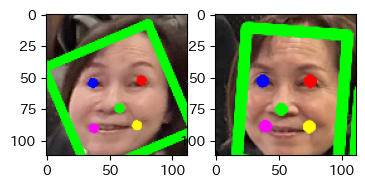

In [14]:
print(type(face1_align), face1_align.shape)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(4,3))
axes[0].imshow(cv.cvtColor(face1_align, cv.COLOR_BGRA2RGB))
axes[1].imshow(cv.cvtColor(face2_align, cv.COLOR_BGRA2RGB))